Download requirements

In [38]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import os
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import  Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras.utils import normalize
import cv2
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [39]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Split dataset

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train), len(x_test))


60000 10000


Preprocessing data

In [41]:
num_classes = 10
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0




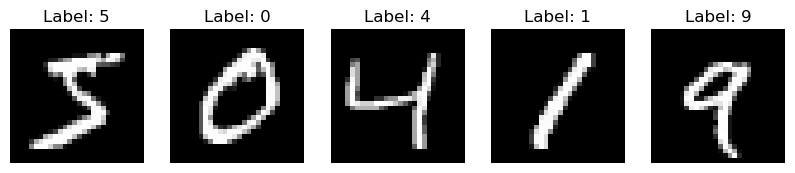

In [42]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Model

In [43]:
model = tf.keras.Sequential()

In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [45]:
optimizer_1 = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer= optimizer_1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [47]:
logdir = "log"
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(x_train, y_train, epochs=10,callbacks= callback)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1305 - accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0809 - accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0702 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0635 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0644 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0603 - accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0579 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0581 - accuracy: 0.9867
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0539 - accuracy: 0.9881
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step -

Plotting the results

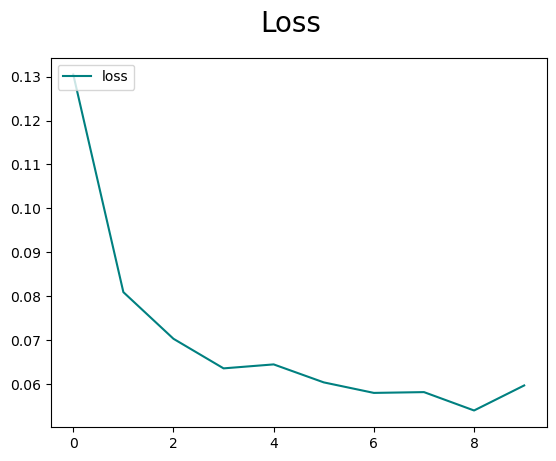

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

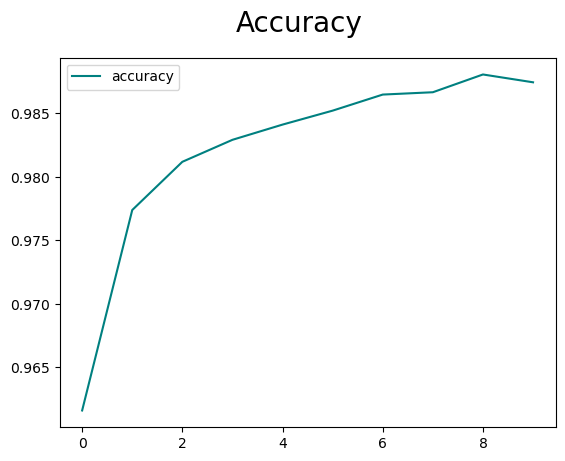

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Save the model

In [51]:
model.save(os.path.join('model','digits.h5'))

In [52]:
new_model = load_model(os.path.join('model','digits.h5'))

Test the model

In [36]:
loss,accuracy = new_model.evaluate(x_test, y_test)
print("Loss:", loss),
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 2.3077 - accuracy: 0.5191
Loss: 2.307673454284668
Accuracy: 0.51910001039505


1/1 [==============================] - 0s 108ms/step
Predicted digit: 4


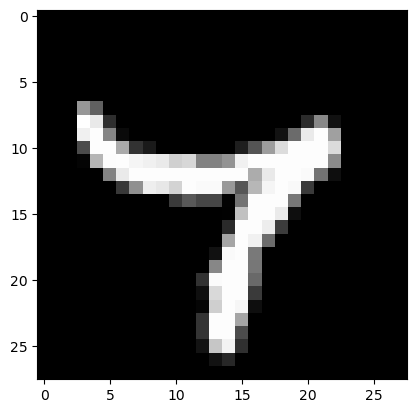

In [37]:

single_image = x_test[124].reshape((1, 28, 28))  # Reshape the image for prediction
prediction = model.predict(single_image)
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)


plt.imshow(single_image.reshape(28,28), cmap="gray")
plt.show()